# Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7236/2914552377.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


# Our target column is "Test_12"

In [2]:
# Read csv file
df = pd.read_csv('student_marks.csv')

In [3]:
# Show first 5 rows
df.head(5)

Student_ID  Test_1  Test_2  Test_3  Test_4  Test_5  Test_6  Test_7  Test_8  \
0       22000      78      87      91      91      88      98      94     100   
1       22001      79      71      81      72      73      68      59      69   
2       22002      66      65      70      74      78      86      87      96   
3       22003      60      58      54      61      54      57      64      62   
4       22004      99      95      96      93      97      89      92      98   

   Test_9  Test_10  Test_11  Test_12  
0     100      100      100       93  
1      59       60       61       67  
2      88       82       90       86  
3      72       63       72       76  
4      91       98       95       88

In [4]:
# Drop the 'student_id' column because it is uninformative for the target.
df.drop('Student_ID', inplace = True , axis = 1)

In [5]:
# Displaying the dataset
profiling = pandas_profiling.ProfileReport(df)
profiling.to_file('profiling.html')
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualization

<Figure size 2000x1200 with 0 Axes>

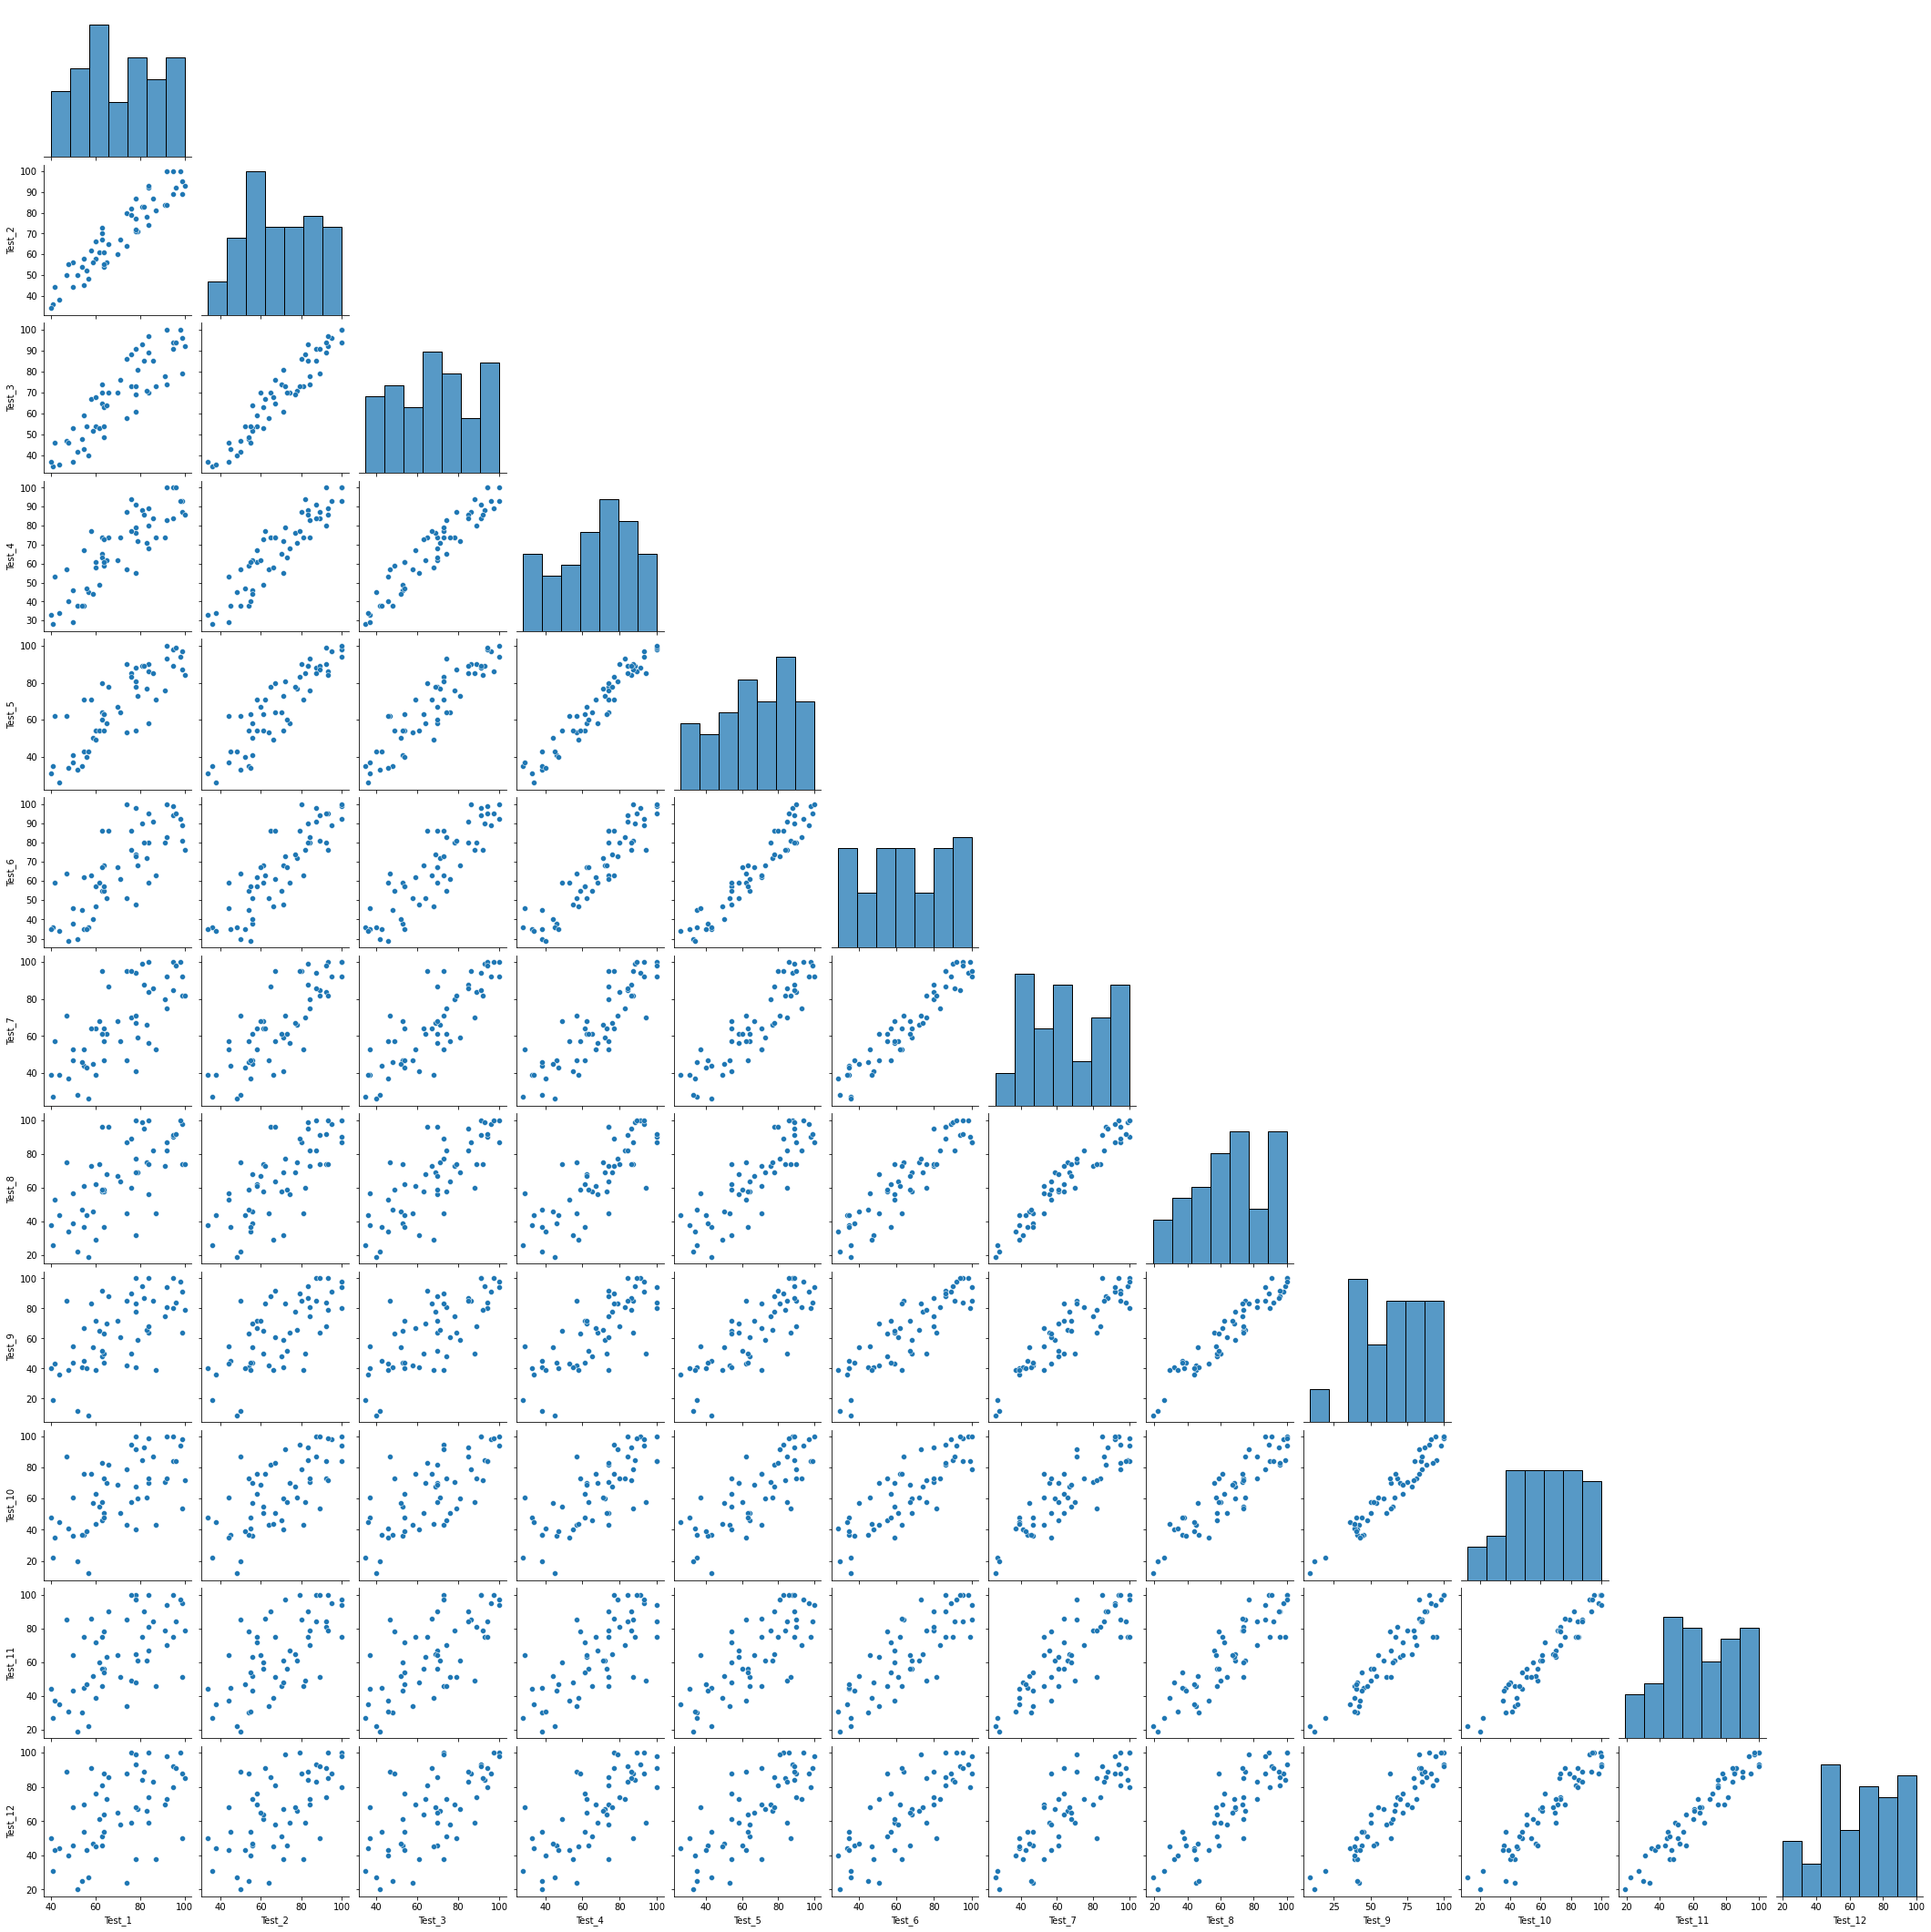

In [6]:
# Visualizing dataset with pairplot
plt.figure(figsize = (10,6), dpi = 200)
sns.pairplot(data = df, corner = True)
plt.show()
# In the plot below, we can observe when the number of test increase it creates better linear relationship with target

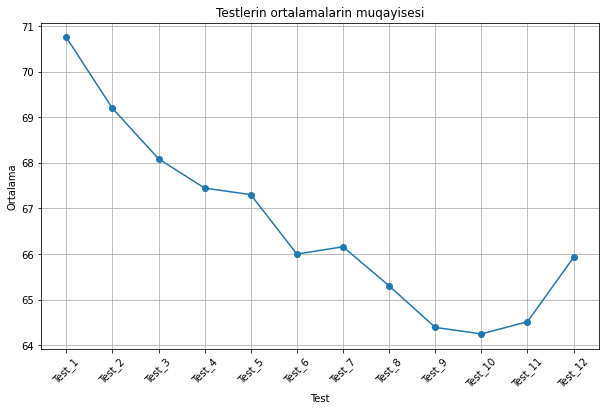

In [11]:
# Here we can see the trend of test scores
plt.figure(figsize=(10, 6))
plt.plot(np.array(df.columns), np.array(df.mean()), marker='o')
plt.title('Testlerin ortalamalarin muqayisesi')
plt.xlabel('Test')
plt.ylabel('Ortalama')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<AxesSubplot:>

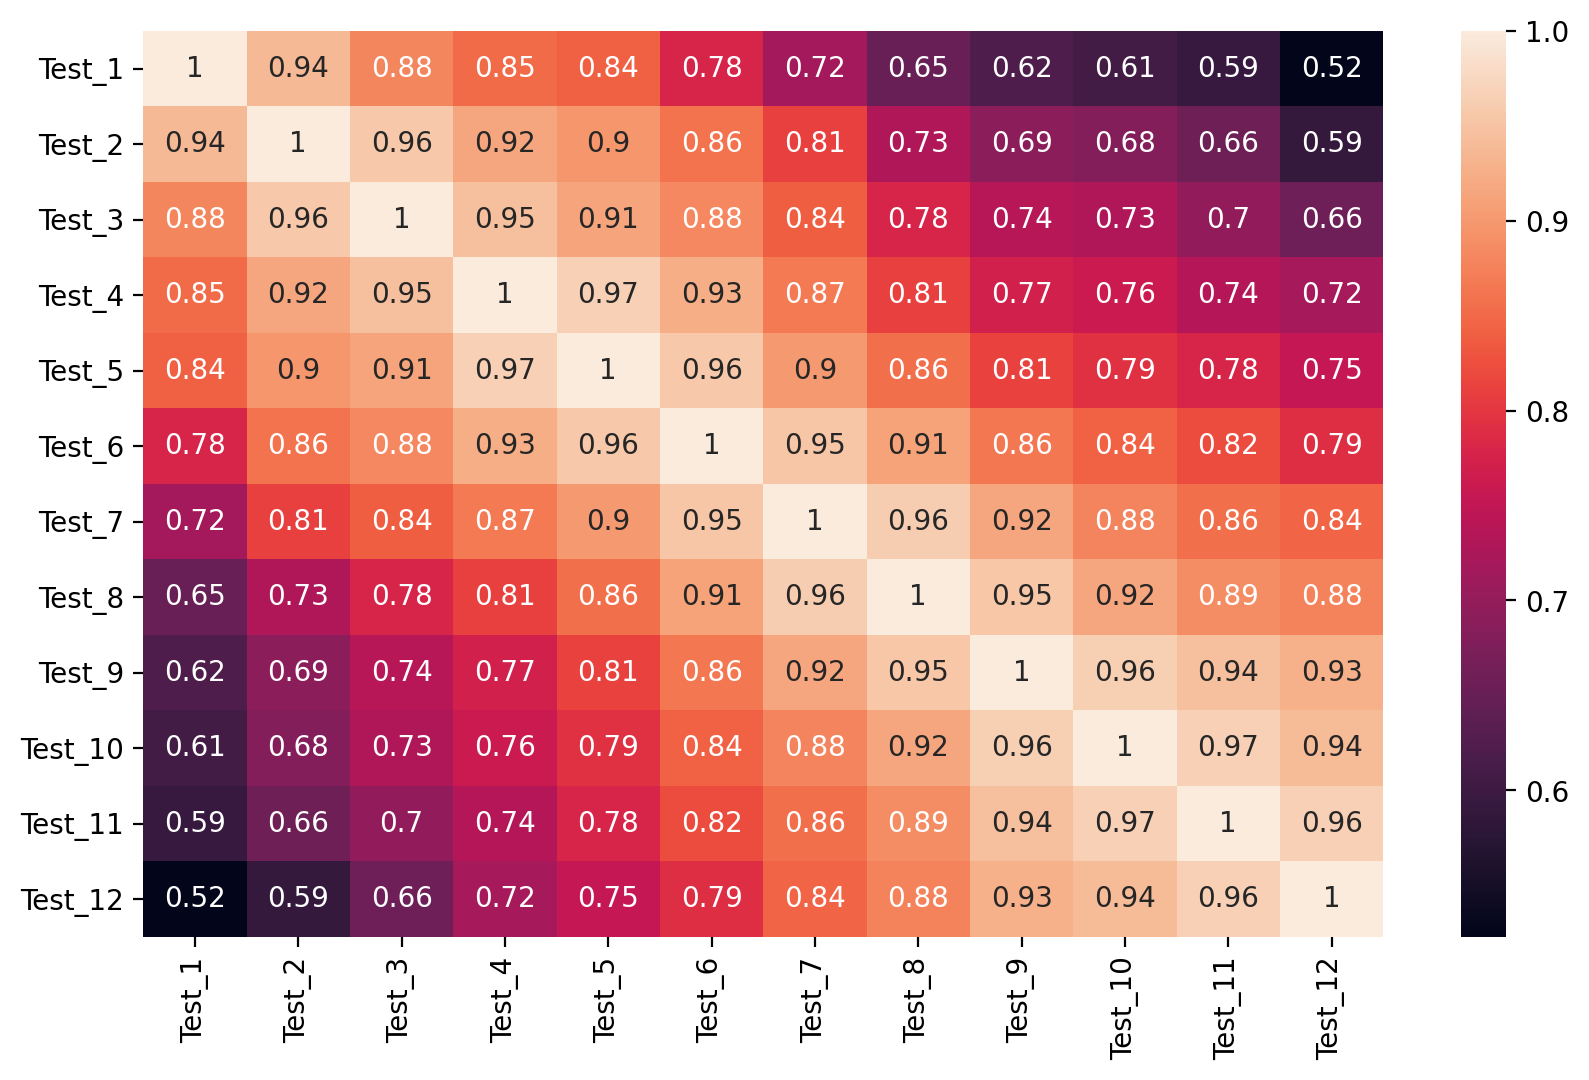

In [12]:
# Display correlation between features
plt.figure(figsize = (10,6), dpi = 200)
sns.heatmap(df.corr(), annot = True)

# Features Preprocessing

I will now introduce additional features to enhance prediction accuracy. It's worth noting that as the complexity of feature combinations increases, it becomes more challenging for a model to learn effectively. To address this, I plan to employ Lasso regression for feature selection. If a feature has a low impact on the target column, the model will automatically consider dropping it. But we must also watch the correlation between created features.

In [13]:
# First column(the sum of Test_1 to Test_11 scores)
df['All_score_everyone'] = df.sum(axis = 1)

In [14]:
# Second column(the mean of Test_1 to Test_11 scores)
columns = [col for col in df.columns if col != 'Test_12' and col != 'All_score_everyone']
df['Mean_Test_1_to_11'] = df[columns].mean(axis=1)

In [15]:
df.head()

Test_1  Test_2  Test_3  Test_4  Test_5  Test_6  Test_7  Test_8  Test_9  \
0      78      87      91      91      88      98      94     100     100   
1      79      71      81      72      73      68      59      69      59   
2      66      65      70      74      78      86      87      96      88   
3      60      58      54      61      54      57      64      62      72   
4      99      95      96      93      97      89      92      98      91   

   Test_10  Test_11  Test_12  All_score_everyone  Mean_Test_1_to_11  
0      100      100       93                1120          93.363636  
1       60       61       67                 819          68.363636  
2       82       90       86                 968          80.181818  
3       63       72       76                 753          61.545455  
4       98       95       88                1131          94.818182

It appears that there is a 100% correlation between the generated features, indicating the need to eliminate one column to address this issue.

<AxesSubplot:>

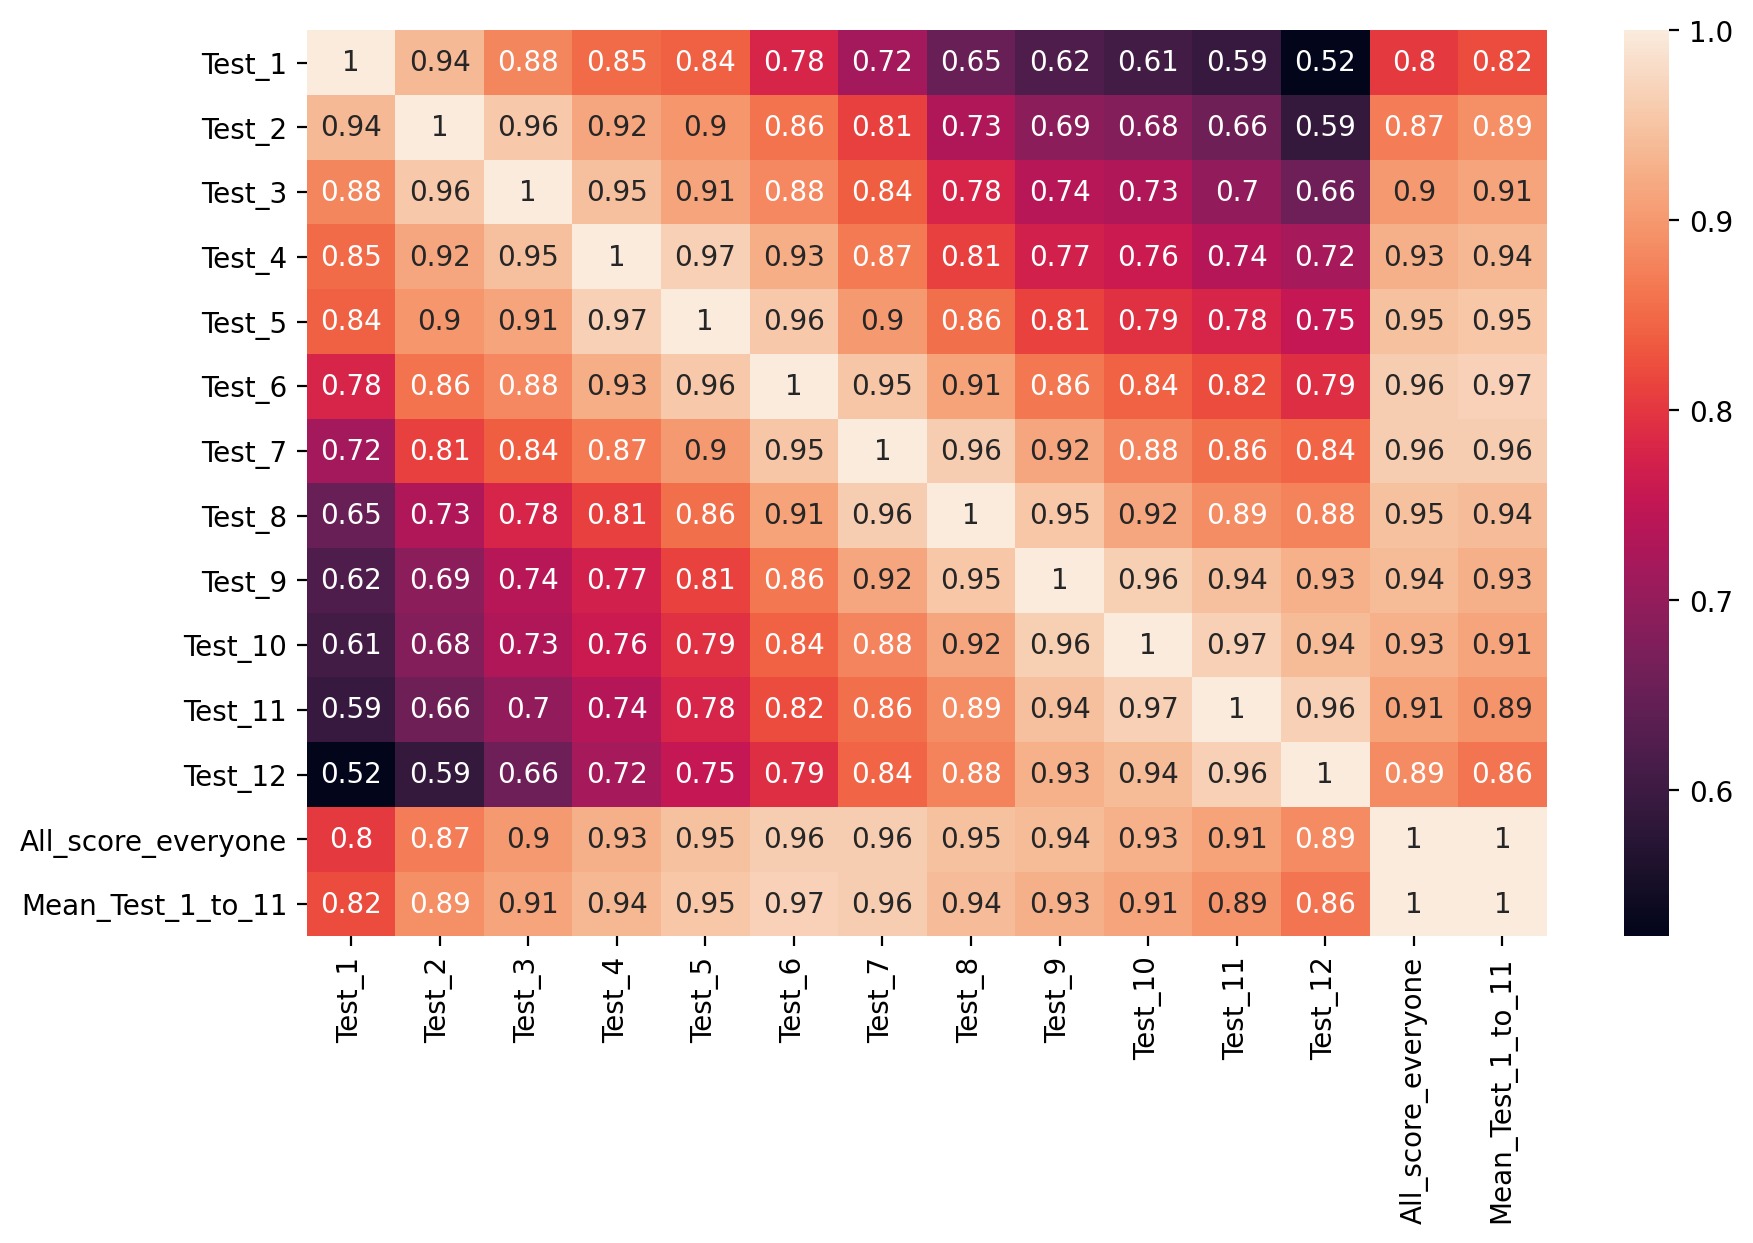

In [16]:
plt.figure(figsize = (10,6), dpi = 200)
sns.heatmap(df.corr(), annot = True)

In [17]:
df.drop('Mean_Test_1_to_11',axis = 1, inplace = True)

In [18]:
# Split the dataset
X = df.drop('Test_12', axis = 1)
y = df['Test_12']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scaling the data for improve performance of the model
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

R_square = lin_reg.score(X_test,y_test)
# Making predictions on the test set
pred = lin_reg.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error :", mse)
print('R Squared Rrror" :',R_square)
# Overfitting 

Mean Squared Error : 2.867667162659422e-26
R Squared Rrror" : 1.0


In [21]:
pd.DataFrame({'Actual':y_test,
      'Prediction':pred})

Actual  Prediction
0       93        93.0
5       31        31.0
33      64        64.0
13      20        20.0
19      61        61.0
50      68        68.0
36      92        92.0
26      73        73.0
44      91        91.0
12      84        84.0
54      54        54.0
3       76        76.0

# Ridge Regression

Ridge regression, also known as Tikhonov regularization, is a variant of linear regression that is used to address multicollinearity and overfitting issues in regression models. 

In [33]:
# Create a Ridge regression instance
ridge = Ridge()
# Define a dictionary of hyperparameter values to search over
parameters = {'alpha': [1, 5, 10, 20, 30, 35, 40, 50, 70, 100]}
# Create a GridSearchCV
ridge_regressor = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
ridge_regressor.fit(X_train_scaled, y_train)
# Print the best parameter and the best negative mean squared error score value found by GridSearchCV
print('Best parameter: {}'.format(ridge_regressor.best_params_))
print(f'Best score: {ridge_regressor.best_score_}')

Best parameter: {'alpha': 1}
Best score : -33.27340631292121


In [23]:
# Predictions on the scaled test data
ridge_predictions = ridge_regressor.predict(X_test_scaled)
# Calculate the mean squared error 
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)

Ridge MSE: 18.157644245089006


In [24]:
pd.DataFrame({'Actual':y_test,
      'Prediction':ridge_predictions})

Actual  Prediction
0       93  100.057393
5       31   25.400041
33      64   59.719432
13      20   18.638830
19      61   58.601536
50      68   59.512922
36      92   95.278210
26      73   70.352108
44      91   86.781771
12      84   83.773267
54      54   54.454136
3       76   74.280373

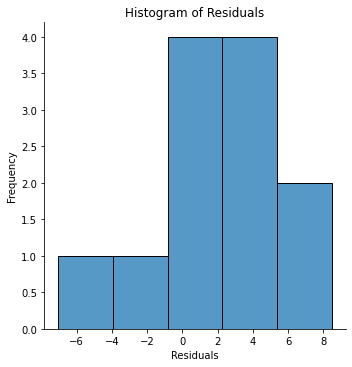

In [25]:
# Calculate the residuals by subtracting the predicted values (ridge_predictions)
# from the actual target values (y_test)
residuals = y_test - ridge_predictions

sns.displot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Lasso regression

 It's similar to Ridge regression, but it has some unique properties that make it particularly useful in certain scenarios. Lasso regression is particularly useful when you want to perform feature selection, handle multicollinearity, create sparse models, and improve model interpretability. It's especially well-suited for high-dimensional datasets and situations where you suspect that many features might not be relevant.

In [26]:
# Create a Lasso regression instance
lasso = Lasso()
parameters = {'alpha':[1,5,10,20,30,35,40,50,70,100]}
lasso_model = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_model.fit(X_train_scaled, y_train)
print('Best parameter: {}'.format(lasso_model.best_params_))
print(f'Best score : {lasso_model.best_score_}')

Best parameter: {'alpha': 1}
Best score : -43.86804581172977


In [27]:
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE:", lasso_mse)

Lasso MSE: 20.984773086178695


In [30]:
pd.DataFrame({'Actual':y_test,
      'Prediction':lasso_predictions})

Actual  Prediction
0       93   99.098090
5       31   29.298587
33      64   56.763021
13      20   21.912245
19      61   62.241125
50      68   63.959155
36      92   98.978514
26      73   72.472241
44      91   83.899570
12      84   78.732202
54      54   54.250151
3       76   72.739658

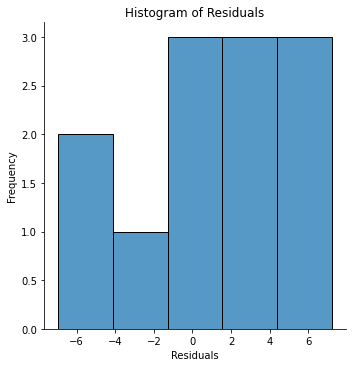

In [31]:
residuals = y_test - lasso_predictions

sns.displot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()